# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [2]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
import matplotlib.pyplot as plt
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [52]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv.bz2',index_col=0)
weather_df=pd.read_csv('weather.csv.bz2',index_col=0)
flights_df.head()
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 16)
Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object


In [5]:
flights_df.dest.unique()
flights_df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Count of flights from NYC to Seattle
nytosea=pd.value_counts(flights_df.dest=='SEA')
print(nytosea)

False    332853
True       3923
Name: dest, dtype: int64


Number of flights from NYC to Seattle in 2013 are 3923

(b) How many airlines fly from NYC to Seattle?

In [7]:
# Your code here
#Subset of flights from NYC to Seattle--creating a dataframe with records of flights from NYC to Seattle
nyctosea_subset=flights_df.loc[flights_df.dest=='SEA']
sum(pd.value_counts(nyctosea_subset.carrier.unique()))

5

There are 5 airlines from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
# Your code here
#Unique flight number to identify unique air planes:
sum(pd.value_counts(nyctosea_subset.flight.unique()))
#Unique tail number to identify unique air planes:
sum(pd.value_counts(nyctosea_subset.tailnum.unique()))

935

 Unqiue air planes from NYC to Seattle are 166 which are calculated using flight number. Alternatively we can also see unique tail numbers which is 935

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
# Your code here
nyctosea_subset.arr_delay.mean()

-1.0990990990990992

The average arrival delay is -1.0990990990990992. A negative arrival delay indicates that the flights arrive before time.

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
# Your code here
#Proportion of flights from each airport= (count of flights from each airport/ total number of flights)*100
total_flights=sum(flights_df.dest=='SEA')
(pd.value_counts(nyctosea_subset.origin)/total_flights)*100

JFK    53.326536
EWR    46.673464
Name: origin, dtype: float64

The proportion of flights from NYC airports to Seattle is as follows:
 1. 46.67% from the EWR airport  
 2. 53.32% from the JFK airport 
 3. 0% from the LGA airport

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
# Your code here
#Creating a data frame and grouping by month and day
delay=pd.DataFrame(flights_df.groupby([flights_df.month,flights_df.day]).mean())
#Largest average departure delay:
print(delay.loc[delay.dep_delay==max(delay.dep_delay)])
#Largest average arrival delay:
print(delay.loc[delay.arr_delay==max(delay.arr_delay)])


             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  
             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  


The date with Largest average departure delay is 8th March, 2013 with an average departure delay of 83.53 mins
The date with Largest average arrival delay is 8th March, 2013 with an average arrival delay of 85.86 mins

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
# Your code here
#Largest average departure delay: 
print(delay.loc[delay.dep_delay==max(delay.dep_delay)])
#Most number of delayed flights in a day:
#Subsetting data to find only flights in a day that are delayed 
dep_delay = flights_df[flights_df.dep_delay > 0]
delay1=pd.DataFrame(dep_delay.groupby([dep_delay.month,dep_delay.day]).count())
delay1 = delay1.sort_values('dep_delay', ascending = 0)
worst_days = delay1['dep_delay']

# Return results
print(worst_days.head(3))


             year     dep_time  dep_delay     arr_time  arr_delay  \
month day                                                           
3     8    2013.0  1416.659574  83.536921  1503.931078  85.862155   

                flight    air_time     distance       hour     minute  
month day                                                              
3     8    2013.537283  153.746867  1002.540347  13.867334  29.926158  
month  day
12     23     674
3      8      653
7      1      652
Name: dep_delay, dtype: int64


The worst dat to fly out of NYC in 2013 would be 8th March. 
The day with the highest average delays : March 8 , 2013 with a departure delay of 83.53 mins and average arrival delay of 85.86 mins.
The day with the highest number of delays :Highest number of delayed flights were on December 23 (674 delayed flights) and the second highest on 8 March(653 delayed flights).

Therefore 8 March can be considered to be the worst day to fly out of NYC.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

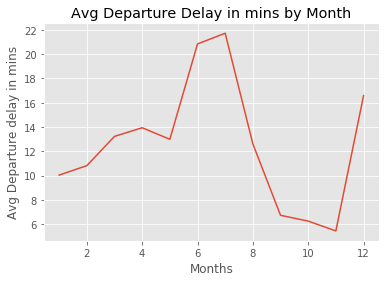

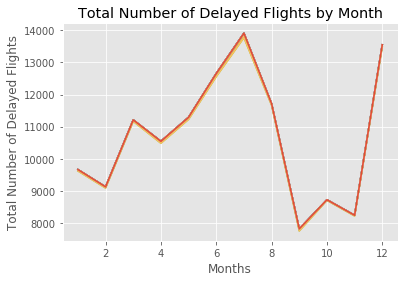

In [13]:
# Your code here
# Exploring the seasonal patterns in average departure delay in mins by Month
flights_df.head()
matplotlib.style.use('ggplot') 
plt.plot(flights_df.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins', size = 12)
plt.title('Avg Departure Delay in mins by Month')
plt.show()

# Exploring the seasonal patterns in total number of delayed by Month
plt.plot(dep_delay.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()

The flights that get delayed the most are during June,July,December.  April and  August also has some significant flight delays. Summer months June and July and Winter month December are generally holiday seasons leading to more air traffic. Also, maybe weather conditions can  be responsiblle for the delays.

(d) On average, how do departure delays vary over the course of a day?

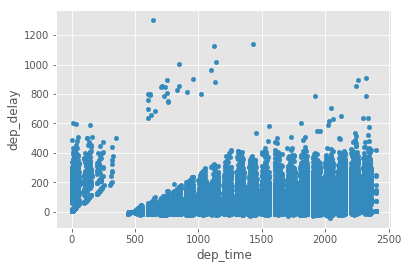

In [14]:
# Your code here
#Plotting departure time vs departure delay
flights_df.plot.scatter(x='dep_time',y='dep_delay')

We can see that there are delays at most times of the day. The maximum delays are noticed between 5am to 10am. Also there are significant delays between 10-12pm in the night.

 Question 3
 Which flight departing NYC in 2013 flew the fastest?

In [15]:
# Your code here
# Speed value for each row= (distance/time)
flights_df['speed'] = (flights_df['distance'] / flights_df['air_time']) * 60

# Sort to see the flights with the highest speed values
speed_flights = flights_df.sort_values('speed', ascending = 0)
print(speed_flights.head(10))

        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
216448  2013      5   25    1709.0        9.0    1923.0      -14.0      DL   
252000  2013      7    2    1558.0       45.0    1745.0       26.0      EV   
205389  2013      5   13    2040.0       15.0    2225.0       -1.0      EV   
157517  2013      3   23    1914.0        4.0    2045.0        2.0      EV   
10224   2013      1   12    1559.0       -1.0    1849.0      -28.0      DL   
70641   2013     11   17     650.0       -5.0    1059.0      -51.0      DL   
129836  2013      2   21    2355.0       -3.0     412.0      -26.0      B6   
70705   2013     11   17     759.0       -1.0    1212.0      -43.0      AA   
71315   2013     11   17    1926.0        1.0       7.0      -32.0      DL   
119511  2013      2   10    1658.0       -2.0    2125.0      -39.0      DL   

       tailnum  flight origin dest  air_time  distance  hour  minute  \
216448  N666DN    1499    LGA  ATL      65.0       762  17.0     9.0 

The flight with the highest reported speed is Delta Airlines flight N666DN (a Boeing 757) from LaGuardia to Atlanta on May 25th. This flight recorded a speed of 703 mph.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
# Your code here
# group by carrier, flight, dest
# Print the combinations that occur 365 times (once per day for entire year)
for everyday, group in flights_df.groupby(['carrier', 'flight', 'dest']):
    if len(group) == 365:
        print(everyday)

('AA', 59, 'SFO')
('AA', 119, 'LAX')
('AA', 181, 'LAX')
('AA', 1357, 'SJU')
('AA', 1611, 'MIA')
('B6', 219, 'CLT')
('B6', 359, 'BUR')
('B6', 371, 'FLL')
('B6', 431, 'SRQ')
('B6', 703, 'SJU')
('B6', 1783, 'MCO')
('DL', 2159, 'MCO')
('DL', 2391, 'TPA')
('EV', 5712, 'IAD')
('UA', 15, 'HNL')
('VX', 251, 'LAS')
('VX', 407, 'LAX')
('VX', 413, 'LAX')


There are 18 daily flights out of NYC:
1.American Airlines has 5 flights flying to San Francisco, Los Angeles, San Juan (Puerto Rico), and Miami.
2.Jet Blue operates 6 flights flying to Charlotte, Burbank, Fort Lauderdale, Sarasota, San Juan, and Orlando. 
3.Delta flies daily to Orlando and Tampa.
4.ExpressJet flying to Washington, DC. 
5.United flying to Honolulu. 
6.Virgin America flies daily to Las Vegas and Los Angeles.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


origin
EWR    1056.742790
JFK    1266.249077
LGA     779.835671
Name: distance, dtype: float64


Text(0.5,1,'Avg Flight Distance from NYC')

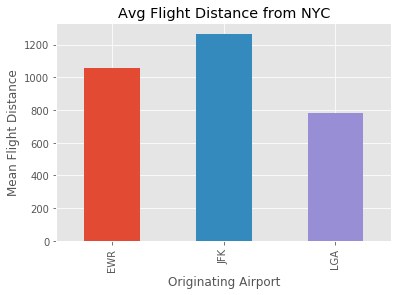

In [71]:
# Your code here
# Which of the NYC airports is used most for flights that travel a long-distance ?
# Group flights_df based on the origin airport 
flight_dist = flights_df.groupby('origin').mean()

print(flight_dist['distance'])

# Average distance flown from each of the originating airports--make bar charts for comparison
flight_dist.distance.plot(kind = 'bar')
plt.xlabel('Originating Airport')
plt.ylabel('Mean Flight Distance')
plt.title(r'Avg Flight Distance from NYC')




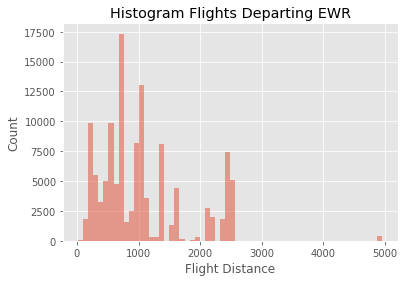

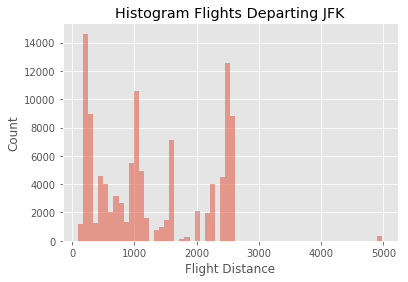

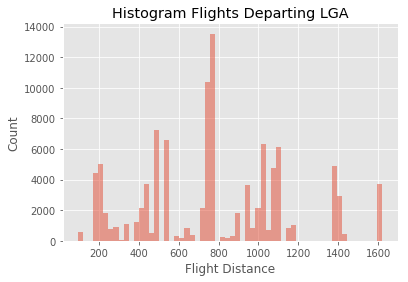

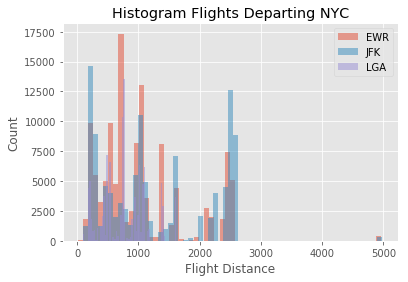

In [78]:
# Series containing distance for each of the origin airports:

flights_EWR = flights_df['distance'][flights_df['origin']== 'EWR']
flights_JFK = flights_df['distance'][flights_df['origin']== 'JFK']
flights_LGA = flights_df['distance'][flights_df['origin']== 'LGA']

# Histogram for each of the above series

plt.hist(flights_EWR.values, 60, alpha=0.5, label='EWR')
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing EWR')
plt.show()

plt.hist(flights_JFK.values, 60, alpha=0.5, label='JFK')
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing JFK')
plt.show()

plt.hist(flights_LGA.values, 60, alpha=0.5, label='LGA')
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing LGA')
plt.show()

#overlay on same plot to see comparison
plt.hist(flights_EWR.values, 60, alpha=0.5, label='EWR')
plt.hist(flights_JFK.values, 60, alpha=0.5, label='JFK')
plt.hist(flights_LGA.values, 60, alpha=0.5, label='LGA')   
         
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing NYC')
plt.legend(loc='upper right')

Every airport has a different variety of flights flying which cover different distances. 
EWR: range from 100 to 2500 miles
JFK: range from 100 to 2600 miles
LGA: range from 100 to 1600 miles
In the distribution we can see that the cluster of flights is around 750 miles and 2500 miles.
Maximum distance is covered by JFK and least distance is serviced by LGA airport.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

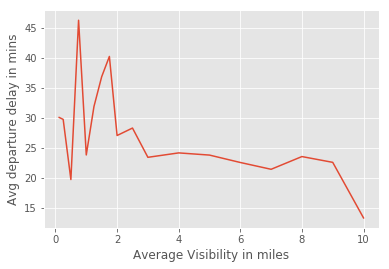

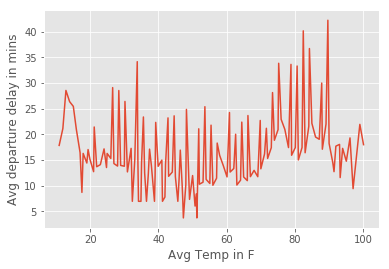

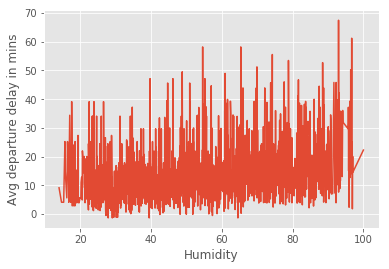

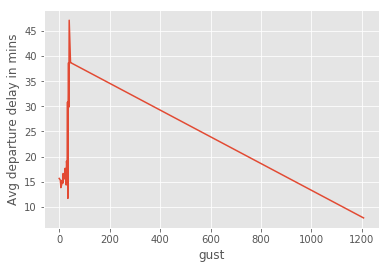

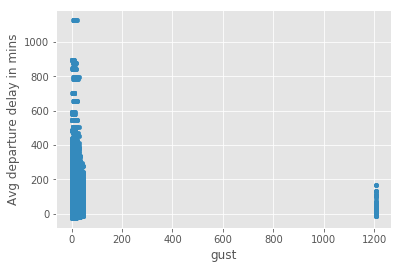

In [79]:
#Merge the flights data and the weather data:
flights_weather = pd.merge(weather_df,flights_df, on = ['year','month','day','origin'], how = 'inner')
flights_weather.head()
matplotlib.style.use('ggplot') 

# Visibility vs departure delay plot:
plt.plot(flights_weather.groupby(['visib'])['dep_delay'].mean())
plt.xlabel('Average Visibility in miles')
plt.ylabel('Avg departure delay in mins')
plt.show()

#Temperature vs departure delay plot:
plt.plot(flights_weather.groupby(['temp'])['dep_delay'].mean())
plt.xlabel('Avg Temp in F')
plt.ylabel('Avg departure delay in mins')
plt.show()

#Humidity vs departure delay plot:
plt.plot(flights_weather.groupby(['humid'])['dep_delay'].mean())
plt.xlabel('Humidity')
plt.ylabel('Avg departure delay in mins')
plt.show()

#Wind gust vs departure delay plot:
plt.plot(flights_weather.groupby(['wind_gust'])['dep_delay'].mean())
plt.xlabel('gust')
plt.ylabel('Avg departure delay in mins')
plt.show()

#Wind gust vs departure delay scatter plot:
flights_weather.plot.scatter(x='wind_gust',y='dep_delay')
plt.xlabel('gust')
plt.ylabel('Avg departure delay in mins')
plt.show()


Visibility shows a relationship with departure delay. As expected, very low visibilities are associated with higher departure delays. For visibility > 3 miles, there does not appear to be a significant effect on departure delay.
From our previous findings and the visualizations we can conclude that the maximum delays are noticed in the hot months of summer. High heat  can be considered the cause of delays-higher temperature correlates with higher average delays. Maximum delays occur when the humidity is high and wind gust is low.